In [27]:
import scipy.io
import pandas as pd
import numpy as np

import networkx as nx
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt


In [2]:
# Load .mat file
input_mat = scipy.io.loadmat('gestures_4d_full_compress_aligned.mat')

In [3]:
input_mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'data', 'labels'])

In [4]:
print(type(input_mat['labels']))
print(type(input_mat['data']))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [5]:
# labels = input_mat['labels']
labels = np.array(input_mat['labels'])
data = input_mat['data']

In [6]:
print(type(labels))
print(type(data))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [11]:
labels = labels.reshape(-1)

In [12]:
labels.shape

(6861,)

In [13]:
data.shape

(6861, 120, 201)

In [16]:
print(labels)

[ 0  0  0 ... 52 52 52]


In [17]:
print(data)

[[[ 5.05291104e-01  5.13857305e-01  5.18480897e-01 ...  3.94099811e-03
    4.22980869e-03  4.72374680e-03]
  [ 5.05174756e-01  5.13822019e-01  5.18401086e-01 ...  4.65120515e-03
    4.81079612e-03  5.20739611e-03]
  [ 5.05122244e-01  5.13797879e-01  5.18341005e-01 ...  3.60559509e-03
    3.89174954e-03  4.41763829e-03]
  ...
  [ 5.04995167e-01  5.11028290e-01  5.17524600e-01 ...  4.53513814e-03
    5.09967096e-03  5.71007701e-03]
  [ 5.05361021e-01  5.11195958e-01  5.17772257e-01 ...  3.15024657e-03
    3.75564466e-03  4.48153820e-03]
  [ 5.05465627e-01  5.11294544e-01  5.17894149e-01 ...  4.34955955e-03
    4.89573367e-03  5.58897480e-03]]

 [[ 5.00643075e-01  5.10102749e-01  5.15007436e-01 ...  1.91848070e-04
    7.61864125e-04  1.64168957e-03]
  [ 5.00641763e-01  5.10101974e-01  5.15007257e-01 ... -1.80377392e-03
   -1.41916436e-03 -4.73221677e-04]
  [ 5.00627518e-01  5.10100901e-01  5.15006959e-01 ... -3.77106923e-03
   -3.30899097e-03 -2.17383029e-03]
  ...
  [ 5.02885878e-01  5.1

## Graph representation of dataset

In [19]:
# Convert gesture values to numerical labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

In [20]:
label_encoder

LabelEncoder()

In [21]:
labels_encoded

array([ 0,  0,  0, ..., 50, 50, 50], dtype=int64)

In [22]:
# Create an empty list to store the graphs
graphs = []

In [24]:
# Iterate over each gesture in the dataset
for i in range(len(data)):
    # Create an empty graph for the current gesture
    graph = nx.Graph()
    
    # Add nodes to the graph representing the coordinates
    for j in range(data.shape[1]):
        # Extract coordinate values
        coordinates = data[i, j]
        
        # Add node with coordinate values as features
        graph.add_node(j, features=coordinates)
    
    # Add edges based on spatial relationships
    threshold_distance = 0.1  # Define a threshold distance for edge creation
    
    for node1 in graph.nodes:
        features1 = graph.nodes[node1]['features']
        
        for node2 in graph.nodes:
            if node1 != node2:
                features2 = graph.nodes[node2]['features']
                
                # Calculate Euclidean distance
                distance = np.linalg.norm(features2 - features1)
                
                # Add edge if distance is below the threshold
                if distance < threshold_distance:
                    graph.add_edge(node1, node2)
    
    # Assign graph-level label
    graph.graph['label'] = labels_encoded[i]
    
    # Add the graph to the list
    graphs.append(graph)

In [36]:
print(graph)

Graph with 120 nodes and 1114 edges


In [30]:
import pickle

# Save the graphs list to a file using Pickle
with open('graphs_data.pkl', 'wb') as f:
    pickle.dump(graphs, f)


In [33]:
# # Load the graphs list from the file
with open('graphs_data.pkl', 'rb') as f:
    graphs = pickle.load(f)


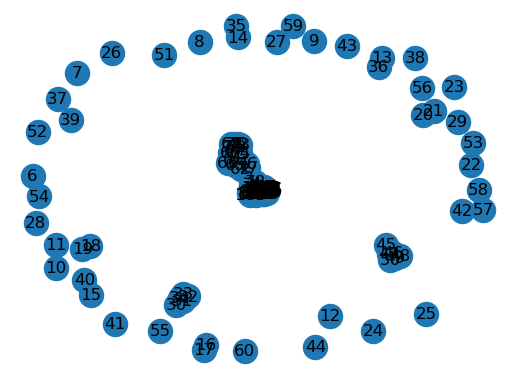

Number of nodes: 120
Number of edges: 977
Average node degree: 16.283333333333335
Graph density: 0.13683473389355744
Average clustering coefficient: 0.5152004798674426
Top 5 nodes by degree centrality: [1, 2, 90, 91, 92]
Size of the largest connected component: 65


In [44]:
# Select a graph from the dataset
graph = graphs[0]

# Create a layout for node positions
pos = nx.spring_layout(graph)

# Create a new figure and axis for visualization
fig, ax = plt.subplots()

# Draw the graph with labels
nx.draw(graph, pos, with_labels=True, ax=ax)

# Display the graph
plt.show()

# Calculate graph statistics
num_nodes = graph.number_of_nodes()
num_edges = graph.number_of_edges()
avg_node_degree = sum(dict(graph.degree()).values()) / num_nodes
graph_density = nx.density(graph)
avg_clustering_coeff = nx.average_clustering(graph)

print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
print(f"Average node degree: {avg_node_degree}")
print(f"Graph density: {graph_density}")
print(f"Average clustering coefficient: {avg_clustering_coeff}")

# Analyze node attributes
node_attributes = nx.get_node_attributes(graph, 'features')
# Perform analysis on node attributes as needed

# Analyze edge attributes
edge_attributes = nx.get_edge_attributes(graph, 'attribute_name')
# Perform analysis on edge attributes as needed

# Identify important nodes or subgraphs
degree_centrality = nx.degree_centrality(graph)
top_k_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:5]
print("Top 5 nodes by degree centrality:", top_k_nodes)

# Analyze graph connectivity
components = nx.connected_components(graph)
largest_component = max(components, key=len)
print("Size of the largest connected component:", len(largest_component))

# Perform graph mining tasks
# Apply graph mining algorithms (e.g., community detection, link prediction, etc.) as needed

# Additional domain-specific analyses
# Perform domain-specific analyses based on your problem or application context


### Interpretation

    120 : The total number of nodes in the graph.
    977: The total number of edges in the graph.
    16.28 : The average number of edges connected to each node. 
    0.13 : A measure of how densely connected the graph is. It is the ratio of the number of edges to the maximum possible number of edges. In our case, the graph density is approximately 0.1368, indicating a moderately sparse graph.
    0.515 : A measure of how closely nodes in a graph tend to cluster together. It is the average of the local clustering coefficients for all nodes in the graph. Our graph has an average clustering coefficient of approximately 0.5152, suggesting a relatively high level of clustering.
     [1, 2, 90, 91, 92] : The five nodes with the highest degree centrality values. Degree centrality measures the number of edges connected to a node. The nodes with IDs 1, 2, 90, 91, and 92 have the highest degree centrality values in our graph.
    65 : The number of nodes in the largest connected component of the graph. In our case, the largest connected component contains 65 nodes.

## Subgraph visualization

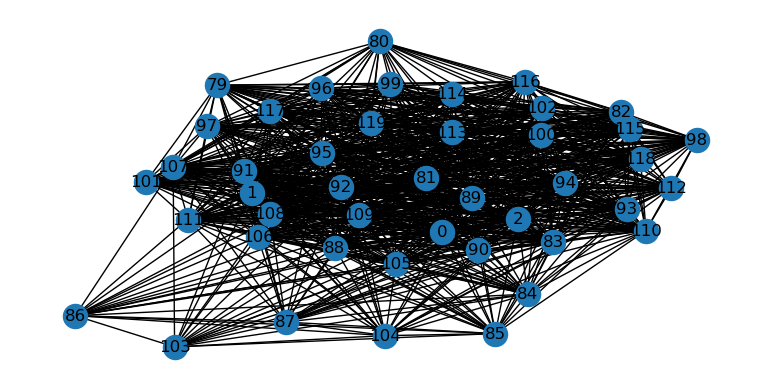

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [49]:
import networkx as nx
import matplotlib.pyplot as plt

# Select a graph from the dataset
graph = graphs[0]

# Detect communities using a community detection algorithm
# Replace this with your preferred community detection algorithm
communities = nx.community.greedy_modularity_communities(graph)

# Create a new figure and axis for visualization
fig, ax = plt.subplots()

# Iterate over the communities and visualize each subgraph
for community in communities:
    subgraph = graph.subgraph(community)

    # Create a layout for node positions
    pos = nx.spring_layout(subgraph)

    # Draw the subgraph with labels
    nx.draw(subgraph, pos, with_labels=True, ax=ax)

    # Add a small separation between subgraphs for clarity
    plt.subplots_adjust(right=1.3)

    # Display the subgraph
    plt.show()


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.data import DataLoader
from torch_geometric.nn import GCNConv, global_max_pool

from torch_geometric.nn import global_mean_pool

from sklearn.model_selection import train_test_split

In [ ]:
# Load the graph dataset
dataset = pd.read_pickle("./graphs_data.pkl")
graphs = dataset[:]

# Split the dataset into train, val, and test sets
train_graphs, test_graphs = train_test_split(graphs, test_size=0.2, random_state=42)
train_graphs, val_graphs = train_test_split(train_graphs, test_size=0.2, random_state=42)

from torch_geometric.data import Data

def graph_to_data(graph):
    # Extract node features and labels from the graph
    x = np.array([graph.nodes[node]['features'] for node in graph.nodes])
    y = graph.graph['label']
    
    # Extract edge indices from the graph
    edge_index = []
    for edge in graph.edges:
        edge_index.append(edge)
        edge_index.append((edge[1], edge[0]))  # Add reverse edge
    
    # Convert lists to torch tensors
    x = torch.tensor(x, dtype=torch.float)
    y = torch.tensor(y, dtype=torch.long)
    edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
    
    # Create a PyG Data object
    data = Data(x=x, edge_index=edge_index, y=y)
    
    return data

In [ ]:
# Convert graph data to PyG's Data objects
train_data = [graph_to_data(graph) for graph in train_graphs]
val_data = [graph_to_data(graph) for graph in val_graphs]
test_data = [graph_to_data(graph) for graph in test_graphs]

# Create data loaders
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32)
test_loader = DataLoader(test_data, batch_size=32)

# Calculate input dimension and number of classes
input_dim = train_data[0].num_node_features
num_classes = len(set([data.y.item() for data in train_data]))

# Define your GNN model
class GNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_classes):
        super(GNNModel, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, hidden_dim)
        self.global_pool = global_mean_pool
        self.fc = nn.Linear(hidden_dim, num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)
        x = torch.relu(x)
        x = self.global_pool(x, batch=torch.tensor([0], device=x.device))  # Max pool over a single node
        x = self.fc(x)
        return x

In [ ]:
# Create the GNN model
hidden_dim = 64
model = GNNModel(input_dim, hidden_dim, num_classes)

# Set up the training
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()
# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        output = model(data.x, data.edge_index)
        output = output.unsqueeze(0).expand(data.x.size(0), num_classes)  # Expand the model's output
        loss = criterion(output, data.y)
        loss.backward()
        optimizer.step()

    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data in val_loader:
            data = data.to(device)
            output = model(data.x, data.edge_index)
            output = output.unsqueeze(0).expand(data.x.size(0), num_classes)  # Expand the model's output
            loss = criterion(output, data.y)
            val_loss += loss.item() * data.num_graphs
            predicted = output.argmax(dim=1)
            correct += (predicted == data.y).sum().item()
            total += data.num_graphs

    val_loss /= total
    val_accuracy = correct / total

    print(f'Epoch: {epoch+1}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')

In [ ]:
# Evaluation
model.eval()
test_loss = 0.0
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        data = data.to(device)
        output = model(data.x, data.edge_index)
        output = output.unsqueeze(0).expand(data.x.size(0), num_classes)  # Expand the model's output
        loss = criterion(output, data.y)
        test_loss += loss.item() * data.num_graphs
        predicted = output.argmax(dim=1)
        correct += (predicted == data.y).sum().item()
        total += data.num_graphs

test_loss /= total
test_accuracy = correct / total

print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')
